dissertacao que explica SVm certinho
http://docs.computacao.ufcg.edu.br/posgraduacao/dissertacoes/2002/Dissertacao_EulandaMirandadosSantos.pdf

plots de cada kernel
https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

imagem de slack vars
https://www.google.com/search?q=svm+slack+variables&client=safari&rls=en&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi42uKgztv5AhW2uZUCHUOHAwIQ_AUoAXoECAEQAw&biw=1728&bih=1000&dpr=2#imgrc=wsCIUa1ZG6X9bM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#bankdata = pd.read_csv("datasets/bill_authentication.csv")

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

In [3]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
bankdata = pd.read_csv(path, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bankdata.shape

(1372, 5)

In [5]:
bankdata['class'].unique()

array([0, 1])

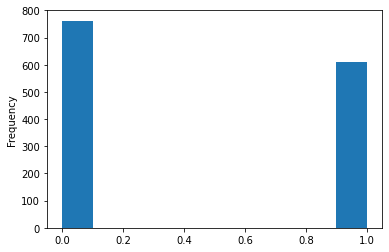

In [6]:
bankdata['class'].plot.hist();

In [7]:
bankdata['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
762-610

152

In [9]:
bankdata['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

In [10]:
bankdata['class'].value_counts(normalize=True)[0] - bankdata['class'].value_counts(normalize=True)[1]

0.11078717201166177

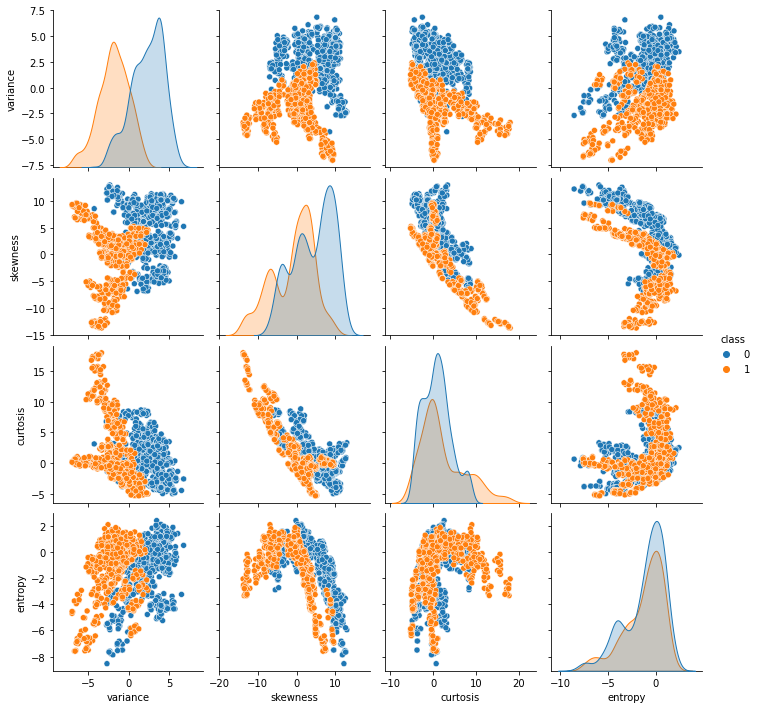

In [11]:
import seaborn as sns
sns.pairplot(bankdata, hue='class');

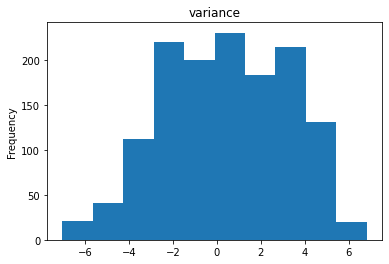

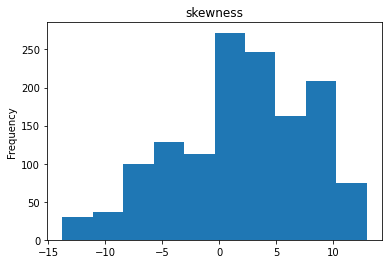

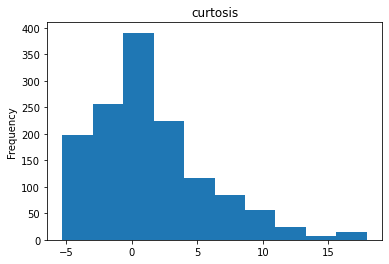

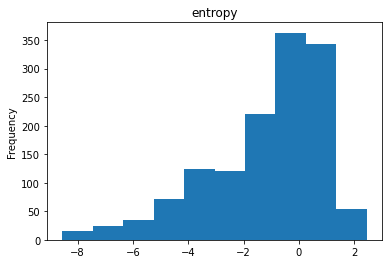

In [12]:
import matplotlib.pyplot as plt

for col in bankdata.columns[:-1]:
    plt.title(col)
    bankdata[col].plot.hist()
    plt.show();

In [13]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [14]:
bankdata.isna().count()

variance    1372
skewness    1372
curtosis    1372
entropy     1372
class       1372
dtype: int64

variance skewness


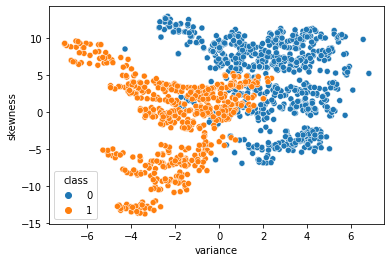

variance curtosis


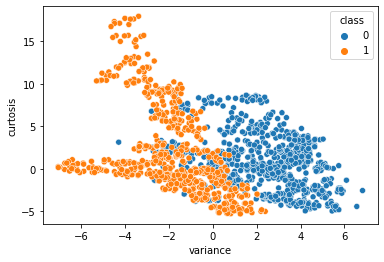

variance entropy


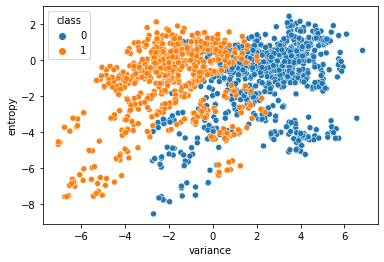

skewness variance


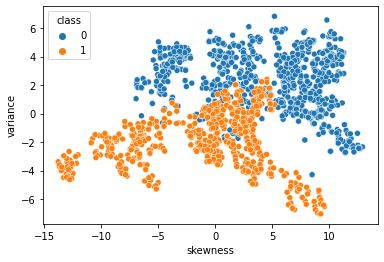

skewness curtosis


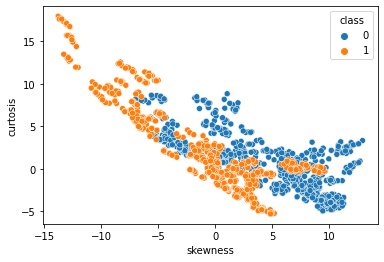

skewness entropy


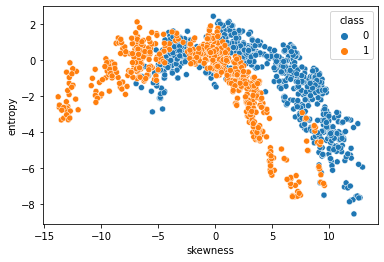

curtosis variance


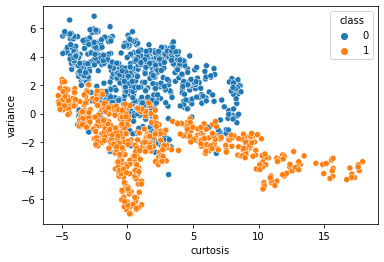

curtosis skewness


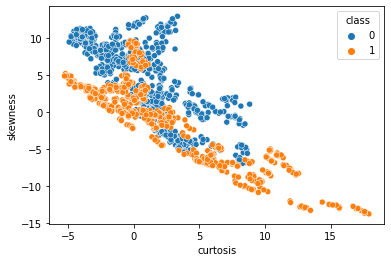

curtosis entropy


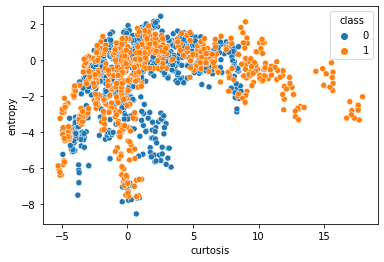

entropy variance


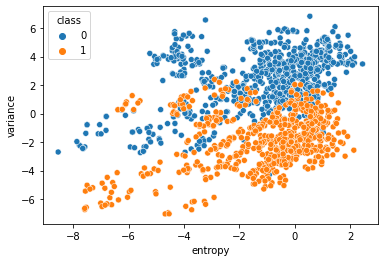

entropy skewness


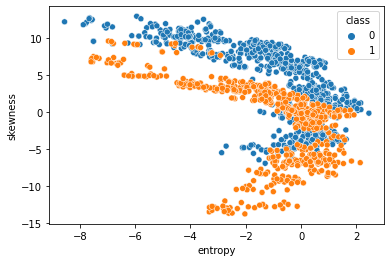

entropy curtosis


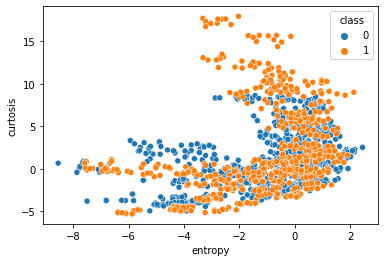

In [15]:
for feat1 in bankdata.columns[:-1]:
    for feat2 in bankdata.columns[:-1]:
        if feat1 != feat2:
            print(feat1, feat2)
            sns.scatterplot(x=feat1, y=feat2, data=bankdata, hue='class')
            plt.show();

In [16]:
X = bankdata.drop('class', axis=1)
y = bankdata['class']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20)

In [18]:
type(X_train.shape)

tuple

In [19]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [20]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = svc.predict(X_test)

In [23]:
y_pred_t = svc.predict(X_train)

In [24]:
import seaborn as sns

In [25]:
607/155 #120

3.9161290322580644

In [26]:
490/120

4.083333333333333

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       602
           1       0.99      0.99      0.99       495

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



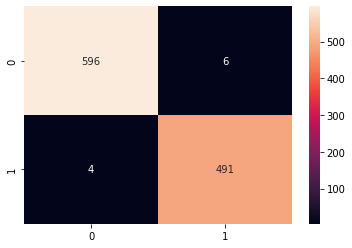

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
cmt = confusion_matrix(y_train,y_pred_t)
sns.heatmap(cmt, annot=True, fmt='d')

print(classification_report(y_train,y_pred_t))

In [28]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
svc.coef_

array([[-2.57399252, -1.4961748 , -1.81008149, -0.25255793]])

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       160
           1       0.97      0.98      0.97       115

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



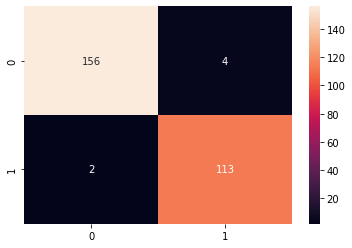

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test,y_pred))

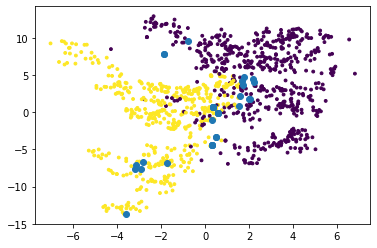

In [31]:
plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, s=8)#, cmap='autumn')
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1]);

In [32]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [33]:
svc = SVC(kernel='linear')
svc.fit(X_train[['variance', 'skewness']], y_train)

SVC(kernel='linear')

/home/cassia/Projects/stack-abuse/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


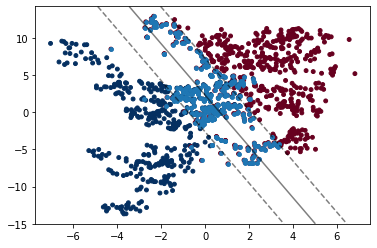

In [34]:
plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, s=15, cmap='RdBu')
plot_svc_decision_function(svc)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], s=15);

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [36]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
svcs = SVC(kernel='linear')
svcs.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [38]:
y_preds = svcs.predict(X_test_scaled)
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[155   5]
 [  1 114]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       160
           1       0.96      0.99      0.97       115

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [39]:
y_preds_train = svcs.predict(X_train_scaled)
print(confusion_matrix(y_train,y_preds_train))
print(classification_report(y_train,y_preds_train))

[[587  15]
 [  0 495]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       602
           1       0.97      1.00      0.99       495

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



In [40]:
a = pd.DataFrame(X_train_scaled, columns=col_names[:-1])

In [41]:
a.shape

(1097, 4)

In [42]:
b = pd.DataFrame(y_train).reset_index(drop=True)

In [43]:
ab = pd.concat([a, b], axis=1)

In [44]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1097.0,1.457357e-17,1.000456,-2.645676,-0.781489,0.016870,0.836598,2.249907
skewness,1097.0,8.906073e-18,1.000456,-2.655497,-0.601842,0.066529,0.827103,1.873814
curtosis,1097.0,-4.048215e-18,1.000456,-1.521243,-0.693244,-0.181329,0.414046,3.736883
entropy,1097.0,6.639073e-17,1.000456,-3.498112,-0.562196,0.288977,0.754036,1.610776


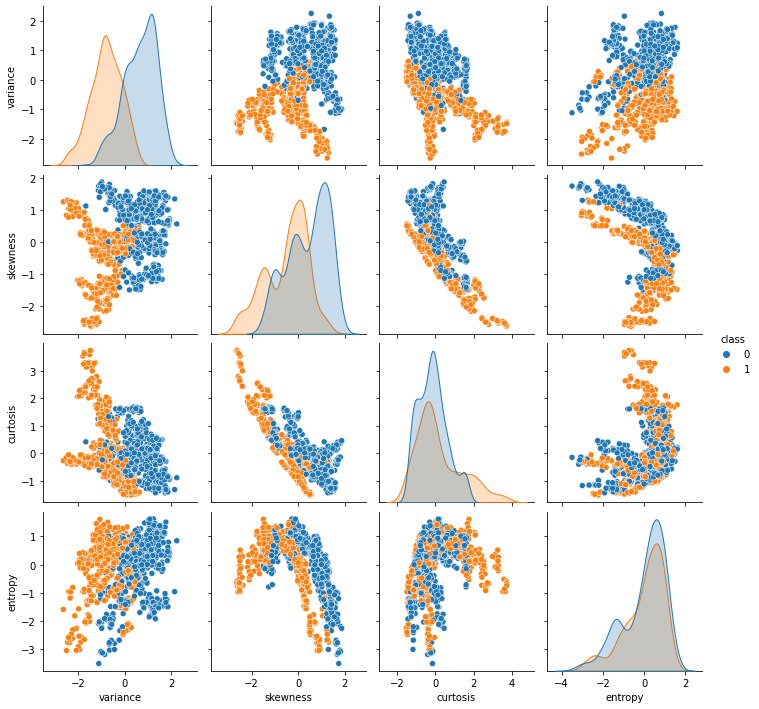

In [45]:
sns.pairplot(ab, hue="class");

In [46]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
svclassifier.support_vectors_

array([[ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.19470e-01, -3.26330e+00,  3.08950e+00, -9.84920e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 3.79840e-01,  7.09750e-01,  7.57160e-01, -4.44410e-01],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [-7.86900e-01,  9.56630e+00, -3.78670e+00, -7.50340e+00],
       [ 5.70600e-01, -2.48410e-02,  1.24210e+00, -5.62080e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.79800e-01,  7.

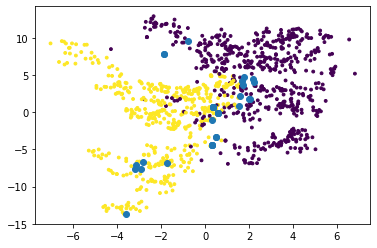

In [48]:
plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, s=8)#, cmap='autumn')
plt.scatter(svclassifier.support_vectors_[:,0],svclassifier.support_vectors_[:,1]);

for plots: https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92
é uma copia descarada daqui: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [49]:
# ax = plt.gca()
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)

# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = svclassifier.decision_function(xy).reshape(XX.shape)

# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])

# ax.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# plt.show()

In [50]:
y_pred = svclassifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[156   4]
 [  2 113]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       160
           1       0.97      0.98      0.97       115

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [52]:
svclassifier2 = SVC(kernel='linear')
svclassifier2.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [53]:
y_pred2 = svclassifier2.predict(X_test_scaled)

In [54]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[155   5]
 [  1 114]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       160
           1       0.96      0.99      0.97       115

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



## Kernel svm

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# # Assign colum names to the dataset
# colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# # Read dataset to pandas dataframe
# irisdata = pd.read_csv(url, names=colnames)

In [57]:
# X = irisdata.drop('Class', axis=1)
# y = irisdata['Class']

In [58]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [68]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [70]:
y_pred = svclassifier.predict(X_test)
y_predt = svclassifier.predict(X_train)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 93  67]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74       160
           1       0.63      1.00      0.77       115

    accuracy                           0.76       275
   macro avg       0.82      0.79      0.75       275
weighted avg       0.85      0.76      0.75       275



In [71]:
print(confusion_matrix(y_train, y_predt))
print(classification_report(y_train, y_predt))

[[379 223]
 [  0 495]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       602
           1       0.69      1.00      0.82       495

    accuracy                           0.80      1097
   macro avg       0.84      0.81      0.79      1097
weighted avg       0.86      0.80      0.79      1097



In [62]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [63]:
y_pred = svclassifier.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[160   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       115

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [65]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [66]:
y_pred = svclassifier.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[112  48]
 [ 42  73]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       160
           1       0.60      0.63      0.62       115

    accuracy                           0.67       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.68      0.67      0.67       275



$ g(x) = \vec{w}\cdot\vec{x} + w_0 $

$ \vec{w}\cdot\vec{x} + w_0 = 0$

$ \vec{w}\cdot\vec{x} + w_0 = 0$